## Final Project Submission

Please fill out:
* Student name: Vivian Jepketer Maiyo
* Student pace: Part time
* Scheduled project review date/time: Not scheduled
* Instructor name: Everlyne Asiko
* Blog post URL: NA


In [1]:
# Your code here - remember to use markdown cells for comments as well!

# Movies Data Analysis

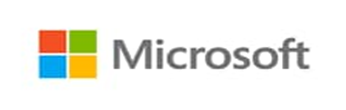

# Overview

This project analyzes movies data to come up with a recommendation on the best movie genre for Microsoft's new movie studio

Let us import the libraries that we will be using for data cleaning, analysis and visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Next, we shall load the data sets that we will need. For this project, we shall be using the data sets;
    •imdb.title.basics as df1
    •imdb.title.ratings as df2
    •tn.movies.budgets as df3


In [3]:
df1= pd.read_csv('./zippedData/imdb.title.basics.csv.gz')
df1.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
df1.shape

(146144, 6)

The data set has 146,144 records with 6 atributes. Lets view more information on the attributes use .info() method

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:
df1.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

The data set contains columns with missing values, we shall load all the data sets and merge before we decide how to treat the missing values. Some data types are also incorrect, lets also deal with it after we merge our data. We shall proceed to load the remaining datasets.

In [7]:
df2= pd.read_csv('./zippedData/imdb.title.ratings.csv.gz')
df2.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [8]:
df2.shape

(73856, 3)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


The data set imdb.title.ratings has 73856 records with 3 attributes. .info() method shows no missing values. Lets check using .describe() method to find out if there are any placeholders.

In [10]:
df2.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [11]:
df3= pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
df3.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
